#### Objective:

To categorise the countries using socio-economic and health factors that determine the overall development of the country.

#### DataSet Details:
Dataset used has 10 columns and description of each is as follows.
##### Column Name	-  Description
    country	- Name of the country
    child_mort	- Death of children under 5 years of age per 1000 live births
    exports -	Exports of goods and services per capita. 
    health -	Total health spending per capita. 
    imports	- Imports of goods and services per capita. 
    Income	- Net income per person
    Inflation -	The measurement of the annual growth rate of the Total GDP
    life_expec - The average number of years a new born child would live if the current mortality patterns are to remain       the same
    total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.
    gdpp -	The GDP per capita. Calculated as the Total GDP divided by the total population.

#### What is Done Here?
1. Visualise power of different unsupervised clustering algorithms by applying them on the country dataset mentioned.
2. Algorithms Used:
    K-Means Clustering
    Agglomerative Clustering
    DBSCAN Clustering        
3. PCA

In [1]:
#import data and do data exploration
import numpy as np
import pandas as pd
orig_data= pd.read_csv('C:\\Users\\rharipri\\Downloads\\archive (1)\\Country-data.csv')
data= pd.read_csv('C:\\Users\\rharipri\\Downloads\\archive (1)\\Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [2]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [4]:
data['country'].value_counts()

Eritrea            1
Guinea-Bissau      1
Jamaica            1
Kyrgyz Republic    1
Romania            1
                  ..
Tanzania           1
Malawi             1
Portugal           1
Brazil             1
Lesotho            1
Name: country, Length: 167, dtype: int64

In [5]:
corr_mat=data.corr()
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x]=0.0
corr_mat.abs().idxmax()

child_mort    life_expec
exports          imports
health              gdpp
imports          exports
income              gdpp
inflation      total_fer
life_expec    child_mort
total_fer     child_mort
gdpp              income
dtype: object

<AxesSubplot:>

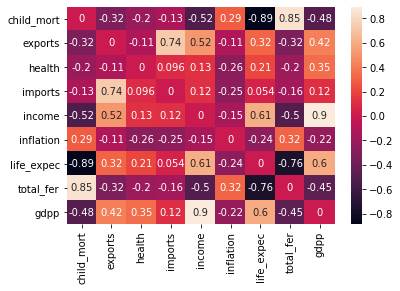

In [6]:
import seaborn as sns
sns.heatmap(corr_mat,annot=True)

#### Observations:
1. There is no non-null data. 9 numeric and 1 string(country name) column.
2. child_mort, exports, imports, income, inflation, gdpp - seems to have large difference between 75% percentile and max value. it looks like these features are right skewed.
3. country feature is identical value, cant be considered as categorical as there is no multiple entries. so, this particular feature might not be helpful for the modeling. but, we shall use for EDA.
4. Based on Correlation values, we see that child_mort, life_expec and total_fer are highly correlated. Also, income and gdpp are positively correlated. whereas life_expec and child_mort are highly negative correlated.

#### Transforming the data

Based on the observations, we will transform skewed data and scale all columns to normalise them.

In [8]:
data=data.drop(['country'], axis=1)

In [ ]:
skew_vals=data.skew(axis = 0, skipna = True)
skew_vals

In [ ]:
skew_limit=1.45
skew_cols=skew_vals[skew_vals>skew_limit].sort_values(ascending=False).to_frame()
skew_cols

In [ ]:
for col in skew_cols.index.to_list():
    #print(col)
    data[col]=np.log1p(data[col])


In [10]:
data.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [11]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaling=StandardScaler()
scaled=scaling.fit_transform(data)
#scaled= MinMaxScaler().fit_transform(data)

scaled_data=pd.DataFrame(scaled,columns=data.columns)

In [12]:
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-2.659217e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
exports,167.0,2.383323e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
health,167.0,5.218713e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
imports,167.0,2.871954e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
income,167.0,-7.512288e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
inflation,167.0,8.376533e-17,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
life_expec,167.0,3.616535e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fer,167.0,3.124580e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
gdpp,167.0,2.127373e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


In [13]:
scaled_data.head(4)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268


### K-Means Clustering

K-means Clustering is the most popular unsupervised machine learning algorithm.It is a centroid-based or distance-based algorithm.The woking of the alorithms is as follows:

1. First we initialize k points called means randomly
2. Then we categorize each item to its closest mean and we update the mean's coordinates,which are the averages of the items categorized in the mean so far
3. We repeat the process for a given number of iteartions and at the end,we have our clusters

To decide how many number of clusters consider we are going to use a most popular elbow method

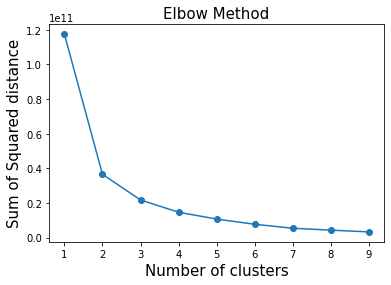

In [14]:
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
orig_data= pd.read_csv('C:\\Users\\rharipri\\Downloads\\archive (1)\\Country-data.csv')
orig_data.drop('country', axis=1,inplace=True)
#np.all(np.isfinite(data))
#data.drop()

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(orig_data)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

#### Observations:

As we can see the elbow or a knee like bend is at 3.So choosing 3 as a number of clusters

In [15]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=111)

In [16]:
pd.Series(kmeans.labels_).value_counts()

1    84
0    47
2    36
dtype: int64

In [18]:
#predicting values
cluster_labels = kmeans.fit_predict(scaled_data)

In [21]:
orig_data= pd.read_csv('C:\\Users\\rharipri\\Downloads\\archive (1)\\Country-data.csv')
preds = kmeans.labels_
kmeans_df = pd.DataFrame(orig_data)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(4)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


C:\Users\rharipri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


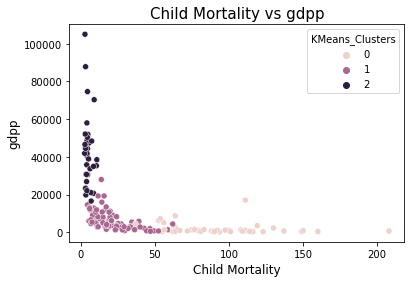

C:\Users\rharipri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


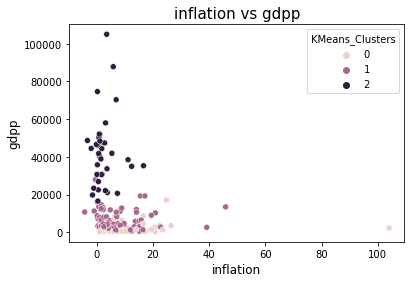

In [33]:
#visulization of clusters child mortality vs gdpp
sns.scatterplot(kmeans_df['child_mort'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()
#visulization of clusters inflation vs gdpp
sns.scatterplot(kmeans_df['inflation'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above two clusters graph we can conclude that

Country having high child-mortality, low GDP per catia and low inflation(The measurement of the annual growth rate of the Total GDP) is a under-developing country
Country having low child-mortality, high gdpp and high infaltion is the developed country

    So here we conclude that
    0 = under-developing country
    1 = developing country
    2 = developed country

In [101]:
#find number of developed country,developing country,under-developed country
under_developing=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']
developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
developed=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']

print("Number of deveoped countries",len(under_developing))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(developed))

Number of deveoped countries 47
Number of developing countries 84
Number of under-developing countries 36


### Hierarchical Clustering
Also called Hierarchical cluster analysis or HCA is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom. This clustering technique is divided into two types:

#### Agglomerative Hierarchical Clustering
Divisive Hierarchical Clustering
Agglomerative Hierarchical Clustering
The Agglomerative Hierarchical Clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). It's a “bottom-up” approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

#### Dendogram
A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

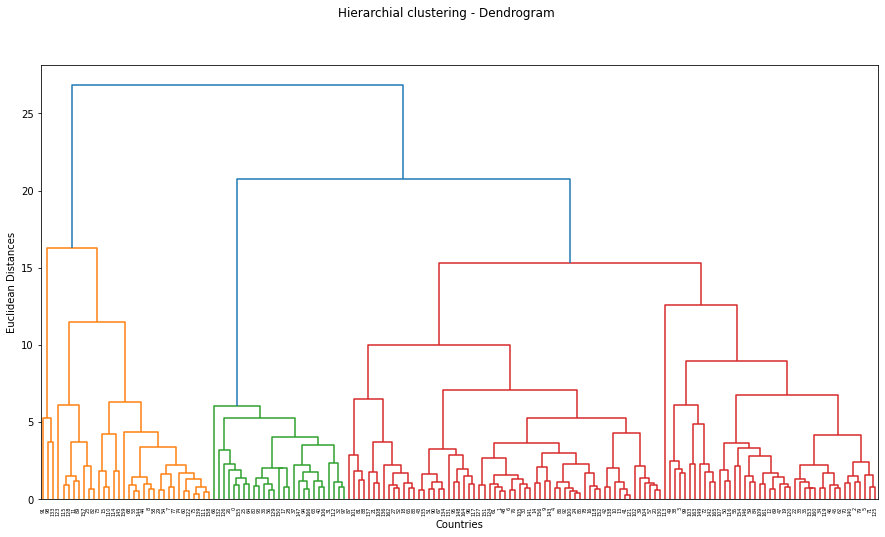

In [28]:
import scipy.cluster.hierarchy as sch
fig=plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.suptitle('Hierarchial clustering - Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

In [65]:
from sklearn.cluster import AgglomerativeClustering
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(scaled_data)
hcluster_label = hcluster.labels_
data['Agg_Cluster']=hcluster.labels_


In [66]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Agg_Cluster,clustdbscan
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,-1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,-1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,-1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,-1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,-1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,-1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,-1


In [ ]:
#Optimizing Minimum Sample And Epsilon
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
for eps in [i/10 for i in range(2,5)]:
    for min_samples in range (7,9):
        print(f'\neps {eps}')
        print(f'\nmin samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(scaled_data)
        score = silhouette_score(scaled_data, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


In [82]:
dbscan = DBSCAN(eps = 1, min_samples = 7)
labels = dbscan.fit_predict(scaled_data)
country_clust = labels
country_clust


array([-1,  0, -1, -1,  0, -1,  0,  1, -1, -1,  0, -1, -1,  0, -1, -1,  0,
       -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1,  1,  0, -1, -1,  0,
       -1,  0, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0,  0, -1,  0, -1, -1,
        0, -1,  1,  1, -1, -1, -1, -1, -1,  1,  0,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1,  1,  0,  1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1,  0,  0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  0,
        0,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1,  0,  1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0, -1, -1, -1, -1,  1, -1,  0, -1, -1, -1, -1, -1, -1],
      dtype=int64)

C:\Users\rharipri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rharipri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


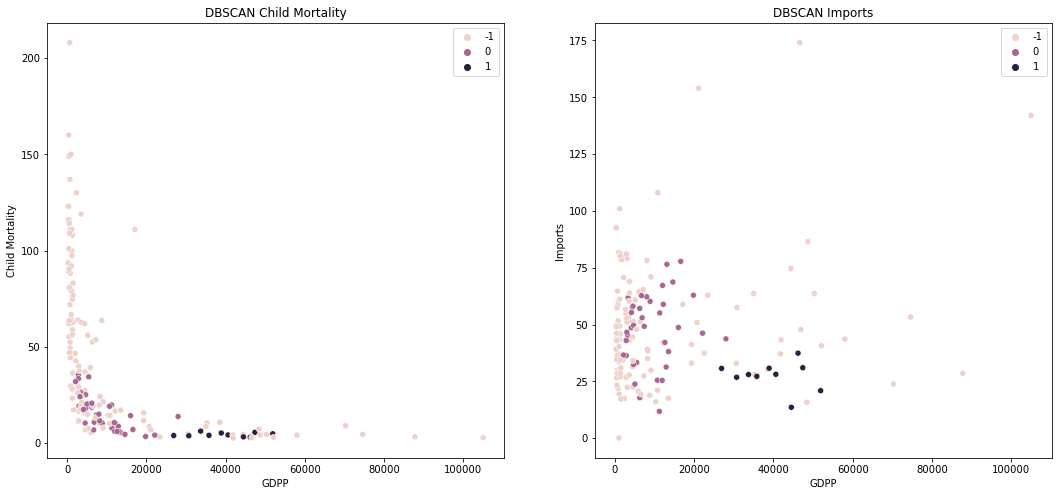

'sns.scatterplot(kmeans_df[\'child_mort\'],kmeans_df[\'gdpp\'],hue=\'KMeans_Clusters\',data=kmeans_df) \nplt.title("Child Mortality vs gdpp", fontsize=15)\nplt.xlabel("Child Mortality", fontsize=12)\nplt.ylabel("gdpp", fontsize=12)\nplt.show()\n#visulization of clusters inflation vs gdpp\nsns.scatterplot(kmeans_df[\'inflation\'],kmeans_df[\'gdpp\'],hue=\'KMeans_Clusters\',data=kmeans_df) \nplt.title("inflation vs gdpp", fontsize=15)\nplt.xlabel("inflation", fontsize=12)\nplt.ylabel("gdpp", fontsize=12)\nplt.show()'

In [83]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(data['gdpp'], data['child_mort'], data = data, hue = 'clustdbscan')
plt.legend(loc = 1)
plt.title('DBSCAN Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(data['gdpp'], data['imports'], data = data, hue = 'clustdbscan')
plt.legend(loc = 1)
plt.title('DBSCAN Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()
#visulization of clusters child mortality vs gdpp
'''sns.scatterplot(kmeans_df['child_mort'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()
#visulization of clusters inflation vs gdpp
sns.scatterplot(kmeans_df['inflation'],kmeans_df['gdpp'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()'''

In [67]:
cluster_name = ['Cluster -1', 'Cluster 0', 'Cluster 1']
color = ['Blue', 'Orange', 'Green']
mortality = ['Noise', 'Low GDPP VS Low to Medium Imports', 'Medium GDPP VS Low Imports']
imports = ['Noise', 'Low GDPP VS Medium Imports', 'Medium GDPP VS Medium Imports']
dbscan_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Child Mortality': mortality, 'Imports': imports})
dbscan_summary

,Color,Name,Child Mortality,Imports
0,Blue,Cluster -1,Noise,Noise
1,Orange,Cluster 0,Low GDPP VS Low to Medium Imports,Low GDPP VS Medium Imports
2,Green,Cluster 1,Medium GDPP VS Low Imports,Medium GDPP VS Medium Imports


#### PCA 

We've been able to identify some patterns in the data and group countries into 3 clusters. However, we should not rely solely on this result to make the recommendation of countries that should receive funding. There are a few alternatives to explore before we can make this recommendation.

The implementation of a clustering model in this case did not bring up patters that we might have not found otherwise, in a way, it only confirmed general knowledge of intuition about this topic. The clustering can be considered as a preprocessing step and further analysis is required. Here are some alternatives to explore:

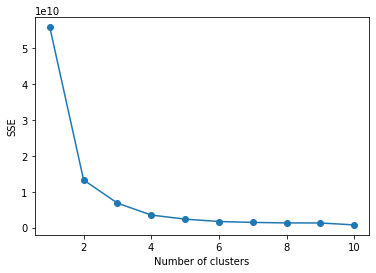

In [113]:
# data without these features 
orig_data= pd.read_csv('C:\\Users\\rharipri\\Downloads\\archive (1)\\Country-data.csv')
dataset_reduced = orig_data.drop(['country','life_expec','total_fer','income'], axis =1)
dataset_reduced.head()
# scale with standard scaling
columns = dataset_reduced.columns

# the scaler to use will be 
scaler = StandardScaler()

rescaled_dataset_reduced = scaler.fit_transform(dataset_reduced)
rescaled_dataset_reduced

# run the model with the standardised reduced dataset
# method to compute the clusters and assign the labels
y_predicted_reduced = kmeans.fit_predict(dataset_reduced) 
y_predicted_reduced

# add the cluster column to the dataframe 
dataset_reduced['cluster'] = y_predicted_reduced
dataset_reduced.head()
dataset_reduced['cluster'].value_counts()
# calculate Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with StandardScaler + PCA
sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(dataset_reduced)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#### Findings

Dropping the features identified as having high correlation earlier in this notebook has resulted in 2 clusters with high inertia. There are no significant changes compared to what we have found in previous steps.

#### Conclusion:

In this notebook i have:
1. Classified countries using different unsupervised learning algorithms like K-Means, DBSCAN and Hierarchical clustering
2. Identified that features like GDP, Health, Income, Child mortality rate contribute more to the classification of clusters
3. To confirm that, used PCA Technique. Dropped highly correlated features and checked the error rate of the model on k-means algorithm. There was no much change in the SSE and cluster needed(refer graph).

#### Next Steps:
1. To understand more pattern within each cluster, they can be broken into sub-clusters.
2. Further to assign probabilistic range for each factor based on which countries has been classified, Supervised ML algorithms can be applied on each cluster. For eg., GDPP from x to y % belong to Developed category and so on.